# **Лабораторная работа №1**
Создание "истории о данных" (Data Storytelling).

**Задание**:

Выбрать набор данных (датасет).
Для лабораторных работ не рекомендуется выбирать датасеты очень большого размера.

Создать "историю о данных" в виде юпитер-ноутбука, с учетом следующих требований:
1. История должна содержать не менее 5 шагов (где 5 - рекомендуемое количество шагов). Каждый шаг содержит график и его текстовую интерпретацию.
2. На каждом шаге наряду с удачным итоговым графиком рекомендуется в юпитер-ноутбуке оставлять результаты предварительных "неудачных" графиков.
3. Не рекомендуется повторять виды графиков, желательно создать 5 графиков различных видов.
4. Выбор графиков должен быть обоснован использованием методологии data-to-viz. Рекомендуется учитывать типичные ошибки построения выбранного вида графика по методологии data-to-viz. Если методология отвергается, обосновать решение по выбору графика.
5. История должна содержать итоговые выводы. В реальных "историях о данных" именно эти выводы представляют собой основную ценность для предприятия.
Сформировать отчет и разместить его в своем репозитории на github.

**Выполнение**

Для выполнения лабораторной работы был взят набор данных "New York Housing Market" (https://www.kaggle.com/datasets/nelgiriyewithana/new-york-housing-market)

Набор содержит сведения о жилой недвижимости в США.


In [ ]:
# Подключение библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Загрузка данных
# Данные переводятся в объект DataFrame, с которым работает большинство библиотек.
df = pd.read_csv('data/NY-House-Dataset.csv', sep=",")

In [ ]:
# Основные характеристики набора данных
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [ ]:
# Размер датасета
df.shape

(4801, 17)

<Axes: xlabel='PRICE', ylabel='Count'>

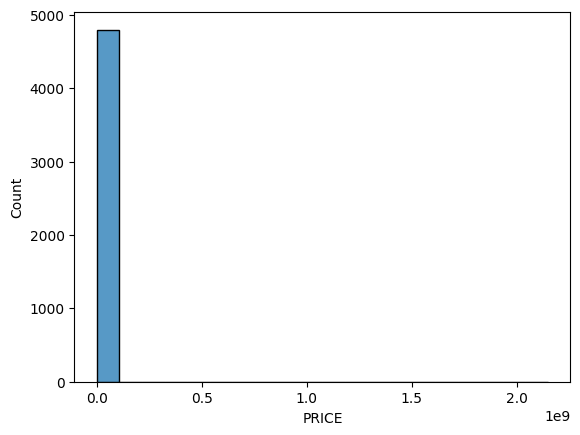

In [ ]:
# Построим гистаграмму цен
# histplot - это функция, позволяющая строить гистограммы.
# Аргументы: набор данных (data frame)
sns.histplot(df, x="PRICE", bins=20)

Видно, что такой график крайне ненаглядный. Возможно, дело в том, что в данных есть выбросы по колонке "Цена", причем очень резкие.

In [ ]:
# Выведем минимальное, максимальное и среднее значения колонки "PRICE"
min_df = df["PRICE"].min()
max_df = df["PRICE"].max()
mean_df = df["PRICE"].mean()

In [ ]:
print(min_df)
print(max_df)
print(mean_df)

2494
2147483647
2356940.17100604


In [ ]:
# Посмотрим значения цены в зависимости от значений квантиля
quantiles = [0.01, 0.05, 0.1, 0.3, 0.5, 0.8, 0.9, 0.95, 0.99]
# Инициализация списка
q_values = []
for q in quantiles:
    # Подсчет значения для квантиля
    value = df["PRICE"].quantile(q)
    # Добавление значения в список
    q_values.append(value)
    print(df["PRICE"].quantile(q))

135000.0
225000.0
280000.0
569000.0
825000.0
1875000.0
3400000.0
6975000.0
22500000.0


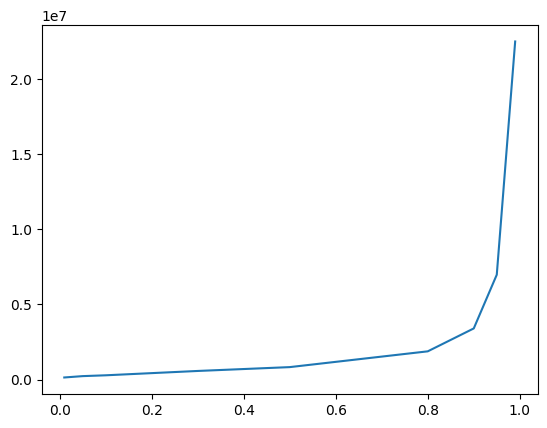

In [ ]:
# Построим график, чтобы оценить рост значений в зависимости от квантилей
plt.plot(quantiles, q_values)

In [ ]:
# Удалим из набора данных выбросы с помощью квантилей
# For each of your dataframe column, you could get quantile with:
q = df["PRICE"].quantile(0.99)
# and then filter with:
filtered_df = df[df["PRICE"] < q]

# Ограничения сверху и снизу
# If one need to remove lower and upper outliers, combine condition with an AND statement:
# q_low = df["PRICE"].quantile(0.01)
# q_hi  = df["PRICE"].quantile(0.99)
# df_filtered = df[(df["col"] < q_hi) & (df["col"] > q_low)]

In [ ]:
# Отфильтруем значения, уберем слишком большие цены
filtered_df = df[df['PRICE'] < 100000]

<Axes: xlabel='PRICE', ylabel='Count'>

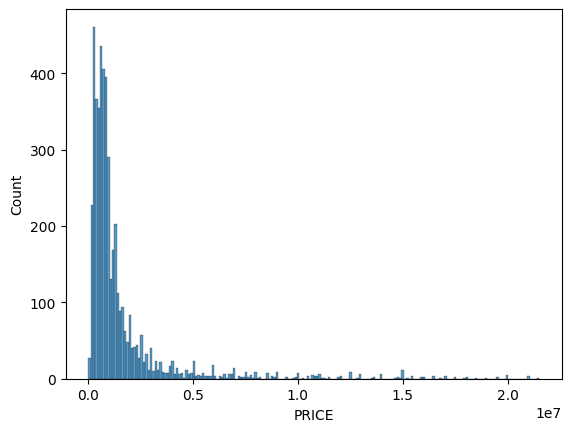

In [ ]:
# Plot the histogram thanks to the distplot function
# histplot - это функция, позволяющая строить гистограммы.
# Аргументы: набор данных (data frame)
sns.histplot(filtered_df, x="PRICE")

<Axes: xlabel='PRICE', ylabel='Count'>

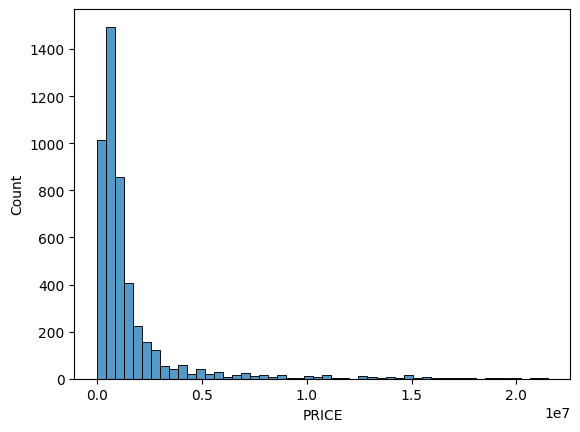

In [ ]:
# Уменьшим число столбцов
sns.histplot(filtered_df, x="PRICE", bins=50)